# 2025-2 INSIGHT 6차 심화세션 사전학습 과제
## 추천시스템

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 선형 분해(Matrix Factorization) </span>

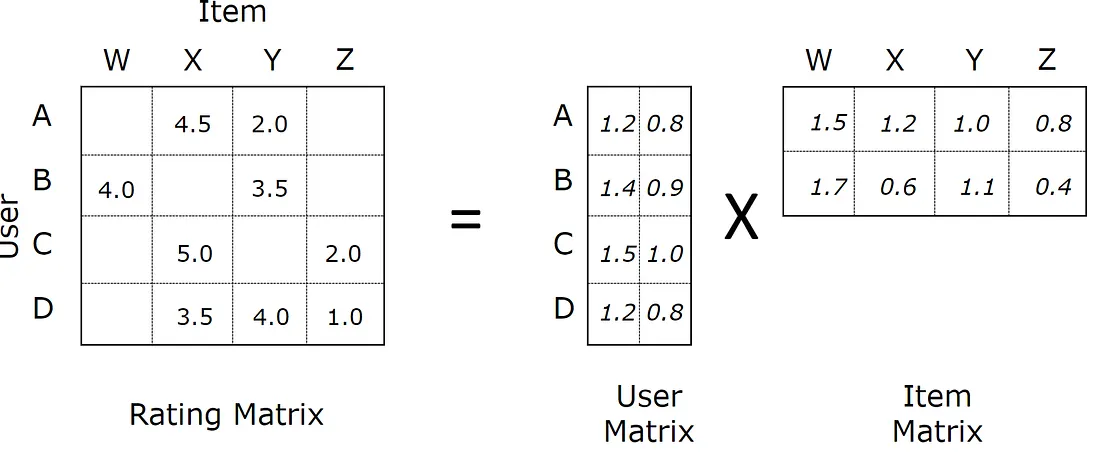

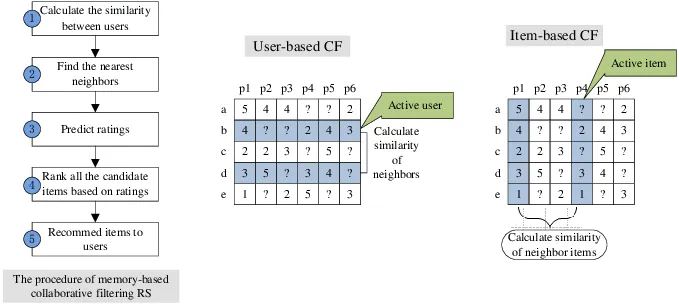

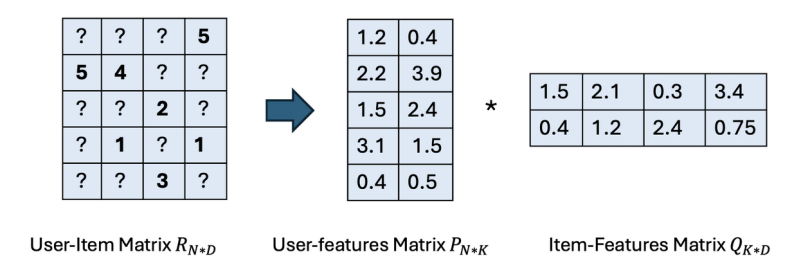

사용자-아이템 상호작용 행렬 (User-Item Matrix $R$)을 두 개의 저차원(low-rank) 행렬, 즉 사용자 잠재 요인 행렬 ($P$)과 아이템 잠재 요인 행렬 ($Q$)로 분해하는 기법

> 사용자와 아이템을 $k$차원의 잠재 요인(latent factor) 벡터로 표현함.

> 사용자 $u$의 아이템 $i$에 대한 평점 $\hat{r}{ui}$는 두 잠재 벡터의 내적(dot product)으로 계산됨.
$$\hat{r}{ui} = p_u^T \cdot q_i$$

>> 관측된 평점 $r_{ui}$와 예측 평점 $\hat{r}_{ui}$의 차이를 최소화하는 $P$와 $Q$를 찾는 것

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 선형 분해의 4가지 방식 </span>

MF는 "어떻게 $P$와 $Q$를 학습시키는가?"에 따라 여러 방식으로 나뉨.

### 1. SVD (Singular Value Decomposition)

행렬 $R$을 $U \Sigma V^T$로 분해하는 고전적인 행렬 분해 기법

> $R$이 매우 희소(sparse)하고 (대부분의 평점이 없음) 결측값(missing value)을 허용하지 않아, 추천시스템에 그대로 적용하기 어려움.

실제로는 SVD의 아이디어를 차용한 Funk SVD 또는 Regularized SVD가 사용되며, 이는 주로 SGD로 최적화됨.

### 2. SGD (Stochastic Gradient Descent)

가장 보편적인 최적화 방식!
<BR> 관측된 평점 데이터 ($u, i, r_{ui}$)를 하나씩 (또는 미니배치로) 보면서 예측 오류를 계산하고, 이 오류를 줄이는 방향으로 $p_u$와 $q_i$를 조금씩 업데이트함.

$L = \sum_{(u,i) \in R} (r_{ui} - p_u^T q_i)^2 + \lambda (||P||^2 + ||Q||^2)$ (과적합 방지를 위한 정규화 항 $\lambda$ 포함)

> 속도가 빠르고, 대용량 데이터 및 희소 행렬에 효과적

### 3. ALS (Alternating Least Squares)

$P$와 $Q$를 동시에 최적화하는 대신, 하나를 상수로 고정하고 다른 하나를 최소제곱법(Least Squares)으로 푸는 과정을 번갈아 수행

Step 1: $Q$를 고정하고, $P$에 대한 손실 함수를 최소화하는 $P$를 구한다!
<BR>
Step 2: 새로 구한 $P$를 고정하고, $Q$에 대한 손실 함수를 최소화하는 $Q$를 구한다.
<BR>
Step 3: 수렴할 때까지 Step 1과 2를 반복~!

> 병렬 처리에 용이하며, 특히 암시적 피드백(Implicit Feedback) 데이터에 강점을 보임. (e.g., Implicit ALS)

### 4. BPR (Bayesian Personalized Ranking)

평점을 직접 예측하는 대신, '랭킹' 자체에 최적화된 방식. 
<BR>
암시적 피드백(클릭, 구매 등)에 주로 사용된다.

사용자가 상호작용한 아이템($i$)이 상호작용하지 않은 아이템($j$)보다 더 높은 순위를 가져야 한다는 Pairwise 가정을 기반으로 함.

$\hat{r}_{ui} > \hat{r}_{uj}$ 가 될 확률을 최대화. ($i$: 긍정 샘플, $j$: 부정 샘플)

평점 예측(Rating Prediction)이 아닌 순위 매기기(Ranking) 문제에 대한 MF의 접근법을 제시했다~는 점에서 의의가 있음.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 딥러닝 기반 모델 </span>

딥러닝은 MF가 포착하기 어려운 복삽한 비선형 패턴과 특징 간의 고차원 상호작용 학습이 가능함.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> VAE 기반 모델 </span>

사용자의 전체 상호작용 기록(e.g., 클릭 벡터)을 입력으로 받아, 이를 저차원의 확률적 잠재 변수(probabilistic latent variables)로 압축(인코딩)한 뒤, 다시 원래의 상호작용 기록으로 복원(디코딩)하도록 학습

> 대표 모델: VAE-CF (Variational Autoencoder for Collaborative Filtering)

작동 방식
<BR>
1. Encoder: 사용자의 아이템 선호도 벡터 $\mathbf{x}_u$ (e.g., [1, 0, 1, ...])를 받아 잠재 변수의 분포 (평균 $\mu$와 분산 $\sigma$)를 출력
2. Sapling: 이 분포에서 잠재 벡터 $\mathbf{z}$를 샘플링
3. Decoder: 잠재 벡터 $\mathbf{z}$를 받아 원래의 선호도 벡터 $\mathbf{x}_u$를 재구성(reconstruction)하는 확률을 예측

> 단순한 잠재 요인을 넘어 '확률적 분포'를 학습하므로 표현력이 풍부하며, 특히 암시적 피드백 데이터에 효과적

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> GNN 기반 모델 </span>

추천시스템을 '사용자-아이템' 상호작용 그래프로 간주함. (사용자와 아이템 = 노드, 상호작용 = 엣지)

작동 방식
<br>
1. Message Passing: GNN은 엣지로 연결된 이웃 노드들의 정보를 수집
2. Embedding Update: 수집된 정보(message)를 바탕으로 현재 노드의 임베딩(잠재 벡터)을 업데이트
3. 이 과정을 여러 레이어에 걸쳐 반복하면 2-hop, 3-hop 등 더 멀리 있는 노드의 정보(고차원 관계)가 임베딩에 반영됨.

> 대표 모델: LightGCN, PinSAGE (Pinterest), NGCF

> "나와 비슷한 사용자가 선호한 아이템" (MF)을 넘어, "나와 비슷한 사용자가 선호한 아이템을 선호하는 또 다른 사용자들이 공통적으로 선호하는 아이템"과 같은 복잡한 고차원(high-order) 관계를 효과적으로 학습할 수 있음.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> Transformer 기반 모델 </span>

사용자의 행동 이력을 '순서가 있는 시퀀스(sequence)'로 봄. (e.g., "신발을 본 후 양말을 봤다")

작동 방식: Transformer의 핵심인 Self-Attention 메커니즘을 사용.
<br>
    Self-Attention: 시퀀스 내의 아이템들 간의 관계를 학습. 사용자가 '다음'에 볼 아이템을 예측하기 위해, 과거에 봤던 아이템들 중 '어떤 아이템'이 현재 예측에 더 중요한지 동적으로 가중치를 부여!

> 대표 모델: SASRec (Self-Attentive Sequential Recommendation), BERT4Rec

> 사용자의 문맥(Context)과 순차적 의도를 파악하는 데 매우 강력. (e.g., "카메라를 본 후 렌즈를 봤다면, 다음엔 삼각대를 추천")

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 최근 딥러닝 추천시스템 트렌드 </span>

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 선형 모델 vs 딥러닝 모델 </span>

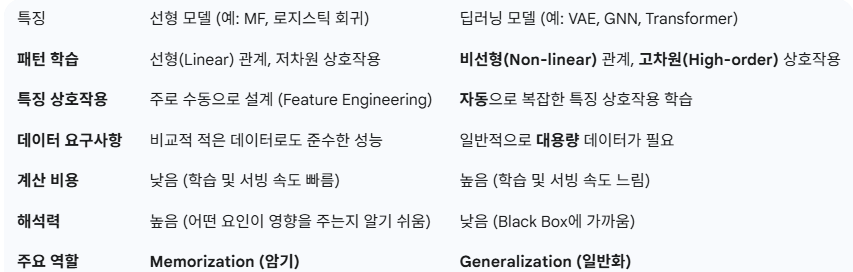

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 왜 선형 모델과 딥러닝을 함께 사용하는가? </span>

현대의 많은 추천시스템(특히 검색, 광고)은 선형 모델과 딥러닝 모델을 하이브리드(Hybrid) 형태로 함께 사용한다. 
<br>
### 대표적인 예가 Google의 Wide & Deep 모델

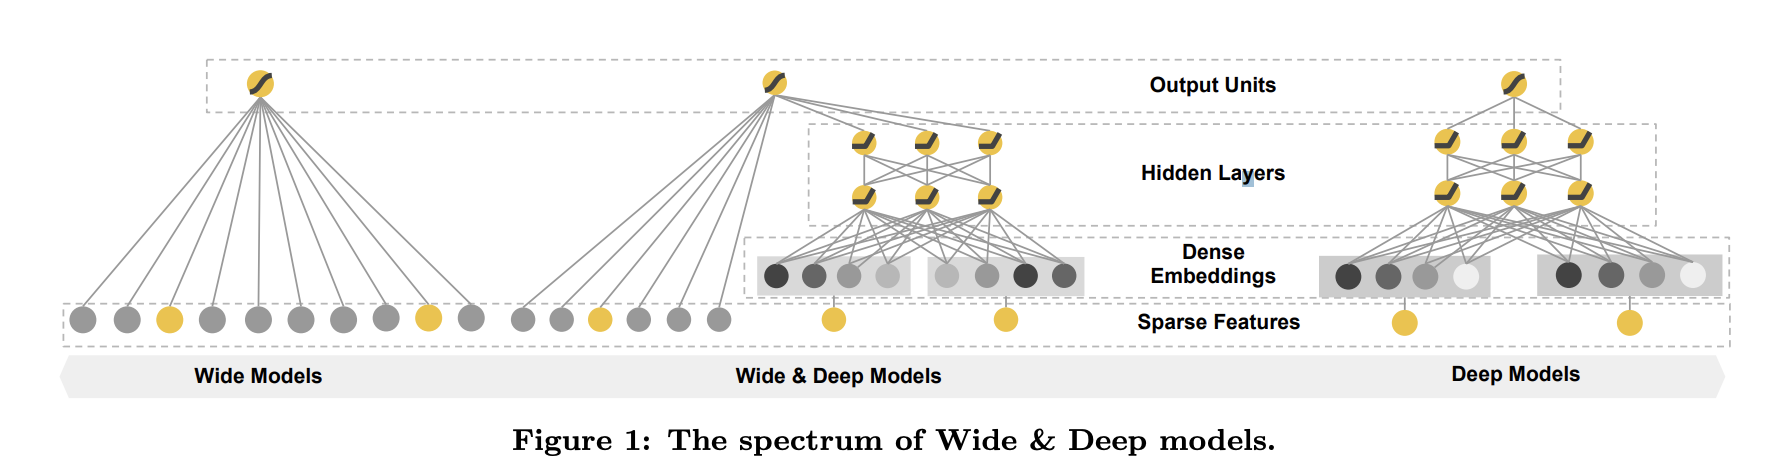

- embedding을 통한 feed-forward neural network와 sparse input을 갖고 있는 generic recommender system을 위한 feature transformation을 가진 linear model을 joint training하기 위한 Wide & Deep learning framework.
- 10억명 이상의 active user와 100만개 이상의 앱을 보유한 모바일 앱스토어 Google Play에서 상품화되는 Wide & Deep 추천시스템의 구현 및 평가.
- Tensorflow에 high-level API를 통해 구현을 open-source화 했음.

#### 아이디어는 단순하지만, Wide & Deep framework는 모바일 앱스토어의 app acquisition rate를 대폭 향상시키면서 training과 serving speed 요건을 충족한다는 것을 보여준다

> 두 모델을 결합함으로써 시스템은 기존에 잘 알던 패턴은 확실하게 암기(wide)해서 맞히고 새롭고 예상치 못한 패턴은 일반화(deep)를 통해 발견할 수 있게 된다. 이는 추천의 정확성과 다양성을 동시에 잡는 핵심 기술!

# 감사합니다. 🐶🐶🐶